In [2]:
from __future__ import division
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math


# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.16.1'

## Data
We use two samples of the same subjects, in this case a group of 19 randomly selected women walking on high heels in one sample and flat shoes in another. The samples show the number of steps taken in 30 days for each woman in the group.

In [3]:
high_heels = pd.Series(
    [189158.,  192110.,  176194.,  156349.,  161981.,  152096.,
     168058.,  156401.,  174939.,  170711.,  170485.,  150565.,
     167770.,  157289.,  191459.,  160661.,  190667.,  184006.,  174503.])
flat_shoes = pd.Series(
    [188777.,  196981.,  190510.,  184603.,  192341.,  197897.,
     154040.,  168098.,  192263.,  154085.,  176084.,  189249.,
     176291.,  151454.,  198118.,  162959.,  167480.,  159884.,  184386.])

data = pd.DataFrame({'high': high_heels, 'flat': flat_shoes})
data.head()

       high      flat
0  189158.0  188777.0
1  192110.0  196981.0
2  176194.0  190510.0
3  156349.0  184603.0
4  161981.0  192341.0

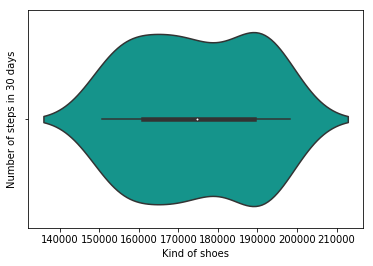

In [4]:
# Let's look at the difference in a side-by-side violin plot
sns.violinplot(data)
plt.ylabel('Number of steps in 30 days')
plt.xlabel('Kind of shoes')
plt.show()

Just peeking at the plot shows a higher average step frequency over the period of 30 days for the group of women wearing flat shoes. But is it a statistical significant difference?

In [5]:
# The violin plot above shows the median, quartiles, IQR and 
# probability density function (kernel density estimation) 
# for both groups
data.describe()

                high           flat
count      19.000000      19.000000
mean   170810.631579  178184.210526
std     13748.423232   16113.058647
min    150565.000000  151454.000000
25%    158975.000000  165219.500000
50%    170485.000000  184386.000000
75%    180100.000000  191386.500000
max    192110.000000  198118.000000

## Hypothesis
We want to know if there is a significant difference in the mean steps taken in 30 days for women wearing high heels and the same group wearing flat shoes. While walking on high heels, the women scored a mean average of $\bar{x}_h=170810.63$. On flat shoes the mean average is $\bar{x}_f=178184.21$ We choose as our test criterium an alpha level of 5%. So our hypothesis states:

|Hypothesis||$\alpha = .05$|
|---:|:---:|---|:---|
|$H_0:$|$\mu_h = \mu_f$|There is no significant difference in mean steps between groups|
|$H_a:$|$\mu_h \neq \mu_f$|There is a significant difference in mean steps between groups|

Note that the hypothesis is written to denote the whole population, not just the sample.

In [6]:
# Take the difference of each subject
data['difference'] = data.high - data.flat
data.head()

       high      flat  difference
0  189158.0  188777.0       381.0
1  192110.0  196981.0     -4871.0
2  176194.0  190510.0    -14316.0
3  156349.0  184603.0    -28254.0
4  161981.0  192341.0    -30360.0

## Conduct a t-Test for dependent means
All steps below are actually the same as for a one sample t-test conducted on a sample of mean differences.

In [7]:
# Calculate the point estimate (mean difference)
point_estimate = data['difference'].mean()
point_estimate

-7373.578947368421

In [8]:
# Calculate the sample standard deviation of the difference
s = data.difference.std()
s

19471.738275755764

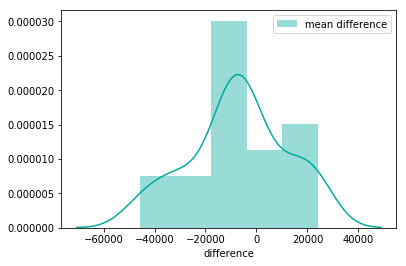

In [9]:
# Show the mean difference distribution
sns.distplot(data.difference, label='mean difference')
plt.legend()
plt.show()

In [10]:
# Calculate the t-statistic with the point estimate
n = data.high.count() # the same for both samples
se = s / math.sqrt(n) # standard error
t = point_estimate / se
n, se, t

(19, 4467.123126268015, -1.650632574689867)

In [11]:
# So what is the probability of getting this mean difference?
dof = n - 1
p = stats.t.sf(abs(t), dof) * 2 # two sided
p

0.11615318918022229

In [12]:
# To test our alternative hypothesis
alpha = .05
p < alpha / 2 # two sided

False

We fail to reject the null. There is no statistical significant difference in the mean differences between steps taken on high heels or flat shoes.

In [13]:
# A quicker way to perform a dependent t-test is to call the scipy
# function ttest_rel on both samples to get our t-statistic and 
# p value
t_statistic, p = stats.ttest_rel(data.high, data.flat)
t_statistic, p

(-1.6506325746898667, 0.11615318918022235)

## Confidence interval

In [14]:
# Calculate t-critical to use with our confidence interval
t_critical = abs(stats.t.ppf(alpha / 2, dof)) # two sided
t_critical

2.10092204024096

In [15]:
# Calculate the confidence interval
margin_of_error = se * t_critical
CI_lo = point_estimate - margin_of_error
CI_hi = point_estimate + margin_of_error
CI_lo, CI_hi

(-16758.656379814995, 2011.498485078152)

We are confident that the true mean difference lies somewhere between -16758 and 2011. This confidence interval crosses 0, so a true mean difference could be 0 (meaning no difference at all).